# Illustration of homeostatic gain control

In [4]:
import numpy as np
import matplotlib.pyplot as plt

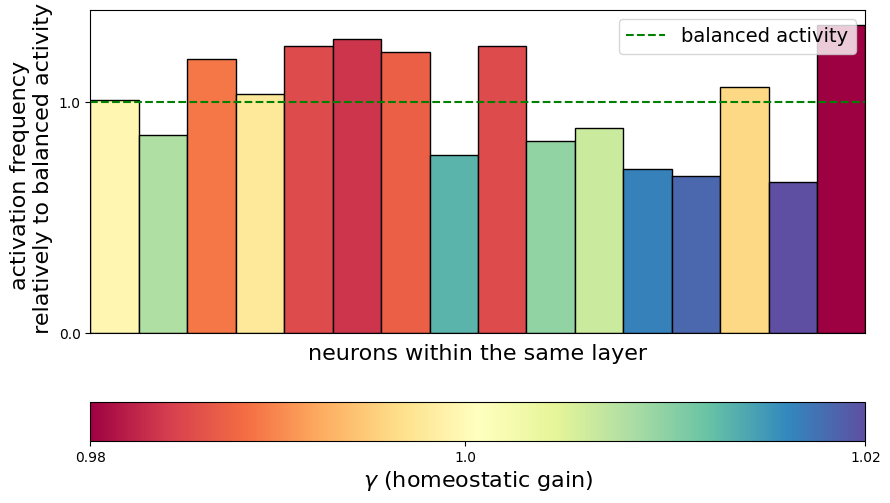

In [5]:
def gainhom(x):
    homparam = [.25, 1]
    N = 4
    return np.exp(homparam[0]*(1/N-N**homparam[1]*x))

cumulative_histogram = np.random.randint(20, 50, 16)

gain = gainhom(cumulative_histogram/np.sum(cumulative_histogram))
colors = (gain-min(gain))/(max(gain)-min(gain))
colormap = plt.cm.get_cmap('Spectral', 1000);
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(np.arange(16), cumulative_histogram/np.sum(cumulative_histogram), width=1, align='edge', ec="k", color=colormap(colors));
ax.set_xlim([0,16]);
ax.set_xlabel('neurons within the same layer', fontsize=16);
ax.set_ylabel('activation frequency \n relatively to balanced activity', fontsize=16);
ax.set_yticks([0,1/16, 2/16, 3/16])
ax.set_yticklabels(ax.get_yticks()*16)
ax.set_xticks(());
ax.hlines(1/16,0,16, linestyles='dashed', color='green', label='balanced activity');
ax.legend(fontsize = 14);
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=colormap), ax=plt.gca(), orientation='horizontal', ticks=[min(gain), 1, max(gain)])
cbar.set_label('$\gamma$ (homeostatic gain)', labelpad=3, fontsize=16);
mini = min(gain)
maxi = max(gain)
interval = (max(gain)-min(gain))/5
onepoint = (1-mini)/(maxi-mini)
cbar.set_ticks([0,onepoint,1]);
cbar.ax.set_xticklabels(np.round([mini, 1, maxi],2));

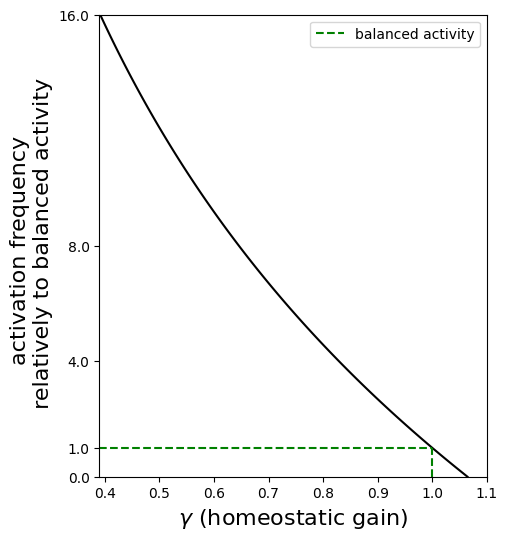

In [6]:
x = np.linspace(0,1,100)
y = gainhom(x)
fig, ax = plt.subplots(figsize=(5,6))
ax.plot(y,x, 'k')
ax.set_ylabel('activation frequency \n relatively to balanced activity', fontsize=16);
ax.set_xlabel('$\gamma$ (homeostatic gain)', fontsize=16);
ax.set_yticks([0,1/16, 4/16, 8/16, 1])
ax.set_yticklabels(ax.get_yticks()*16)
ax.vlines(1,0,1/16, linestyles='dashed', color='green', label='balanced activity')
ax.hlines(1/16,0.39,1, linestyles='dashed', color='green')
ax.axis([0.39,1.1,0,1]);
ax.legend();

# Stream of events illustration

In [7]:
import tonic
from torch.utils.data import DataLoader

In [84]:
learningset = tonic.datasets.POKERDVS(save_to='../Data/', train = False,
                                transform=tonic.transforms.NumpyAsType(int))
loader = DataLoader(learningset, shuffle=True)

x_index = learningset.ordering.index('x')
y_index = learningset.ordering.index('y')
t_index = learningset.ordering.index('t')
p_index = learningset.ordering.index('p')

X_on, Y_on, T_on, X_off, Y_off, T_off = ([] for i in range(6))
iev = 100
events, target = next(iter(loader))

/tmp/ipykernel_2903338/2180605854.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sub1.scatter(T_on, X_on, Y_on, cmap= plt.cm.plasma, marker=',', alpha=0.5)
/tmp/ipykernel_2903338/2180605854.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sub1.scatter(T_off, X_off, Y_off, cmap= plt.cm.plasma, marker=',', alpha=0.5)
/tmp/ipykernel_2903338/2180605854.py:23: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  sub1.grid(b = None)


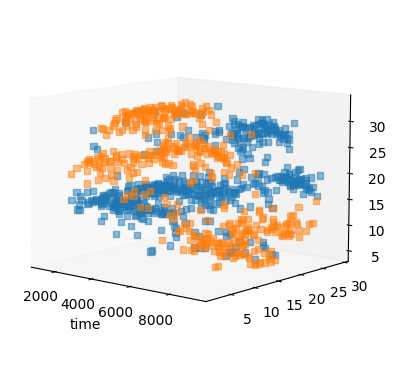

In [85]:
target_event = events.shape[1]
target_event = 1000
while iev<target_event:
    x,y,t,p = events[0][iev][x_index], \
            events[0][iev][y_index], \
            events[0][iev][t_index], \
            events[0][iev][p_index]
    if p:
        X_on.append(x)
        Y_on.append(abs(learningset.sensor_size[1]-y))
        T_on.append(t)
    else:
        X_off.append(x)
        Y_off.append(abs(learningset.sensor_size[1]-y))
        T_off.append(t)
    iev+=1
fig = plt.figure(figsize=(10,5))
sub1 = fig.add_subplot(1,2,1, projection="3d")
sub1.scatter(T_on, X_on, Y_on, cmap= plt.cm.plasma, marker=',', alpha=0.5)
sub1.scatter(T_off, X_off, Y_off, cmap= plt.cm.plasma, marker=',', alpha=0.5)
#sub1.arrow([0,max(T_off)], [0,0], [0,0])
sub1.view_init(10,-50)
sub1.grid(b = None)
sub1.set_xlabel('time')
#sub1.axis('off')
plt.show()

In [174]:
def plot_linear_cube(ax, x, y, z, dx, dy, dz, zorder = 0, color='grey'):
    xx = [x, x, x+dx, x+dx, x]
    yy = [y, y+dy, y+dy, y, y]
    kwargs = {'alpha': 1, 'color': color, 'linestyle':'-', 'lw':1}
    ax.plot3D([x+dx, x+dx], [y, y+dy], [z], zorder=zorder+1, **kwargs)
    ax.plot3D([x, x+dx], [y, y], [z], zorder=zorder+1, **kwargs)
    ax.plot3D([x, x+dx], [y+dy, y+dy], [z], zorder=zorder-1, **kwargs)
    ax.plot3D([x, x], [y, y+dy], [z], zorder=zorder-1, **kwargs)
    ax.plot3D([x+dx, x+dx], [y, y+dy], [z+dz], zorder=zorder+1, **kwargs)
    ax.plot3D([x, x+dx], [y, y], [z+dz], zorder=zorder+1, **kwargs)
    ax.plot3D([x, x+dx], [y+dy, y+dy], [z+dz], zorder=zorder-1, **kwargs)
    ax.plot3D([x, x], [y, y+dy], [z+dz], zorder=zorder-1, **kwargs)
    ax.plot3D([x, x], [y, y], [z, z+dz], zorder=zorder-1, **kwargs)
    ax.plot3D([x, x], [y+dy, y+dy], [z, z+dz], zorder=zorder-1, **kwargs)
    ax.plot3D([x+dx, x+dx], [y+dy, y+dy], [z, z+dz], zorder=zorder+1, **kwargs)
    ax.plot3D([x+dx, x+dx], [y, y], [z, z+dz], zorder=zorder+1, **kwargs)
    print(x, x+dx)
    return ax


from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

tensor(10236) tensor(11236.)


/tmp/ipykernel_2903338/3722143177.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sub1.scatter(T_on, X_on, Y_on, cmap= plt.cm.plasma, marker=',', alpha=0.5, color='blue', label='ON events')
/tmp/ipykernel_2903338/3722143177.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sub1.scatter(T_off, X_off, Y_off, cmap= plt.cm.plasma, marker=',', alpha=0.5, color='red', label='OFF events')
/tmp/ipykernel_2903338/3722143177.py:29: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  sub1.grid(b = None)


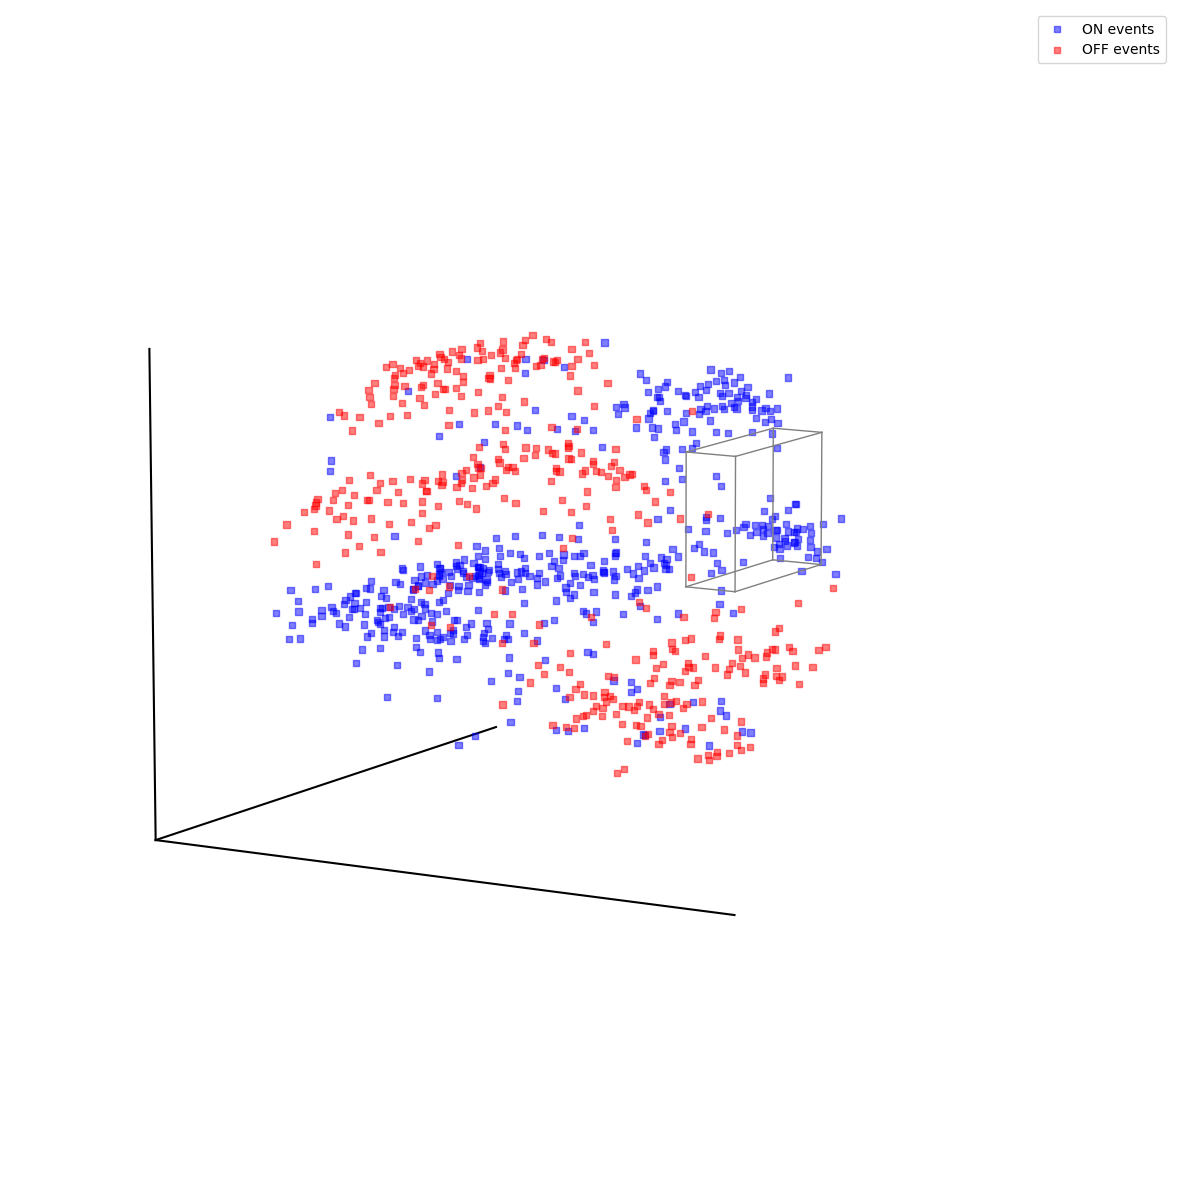

In [182]:
target_event = events.shape[1]
target_event = 1000
while iev<target_event:
    x,y,t,p = events[0][iev][x_index], \
            events[0][iev][y_index], \
            events[0][iev][t_index], \
            events[0][iev][p_index]
    if p:
        X_on.append(x)
        Y_on.append(abs(learningset.sensor_size[1]-y))
        T_on.append(t)
    else:
        X_off.append(x)
        Y_off.append(abs(learningset.sensor_size[1]-y))
        T_off.append(t)
    iev+=1
fig = plt.figure(figsize=(15,25))
sub1 = fig.add_subplot(1,1,1, projection="3d")
sub1.scatter(T_on, X_on, Y_on, cmap= plt.cm.plasma, marker=',', alpha=0.5, color='blue', label='ON events')
sub1.scatter(T_off, X_off, Y_off, cmap= plt.cm.plasma, marker=',', alpha=0.5, color='red', label='OFF events')
#axes
sub1.plot3D([0, 0], [0, 34], [0, 0], color='black')#, zorder=zorder-1, **kwargs)
sub1.plot3D([0, 0], [0, 0], [0, 34], color='black')
sub1.plot3D([0, events[0,-1,t_index]], [0, 0], [0, 0], color='black')
t_window = int(2e3)
indice_start = np.where(events[0,:,t_index]<events[0,-1,t_index]-t_window)[0][-1]
sub1 = plot_linear_cube(sub1, events[0][indice_start][t_index], 5, 20, t_window/2, 9, 9, zorder=4)
sub1.view_init(10,-60)
sub1.grid(b = None)
sub1.set_xlabel('time')
sub1.axis('off')
plt.legend()
plt.show()

In [184]:
fig.savefig('stream3D', dpi = None, bbox_inches=None, transparent=True)

# Neural Network 

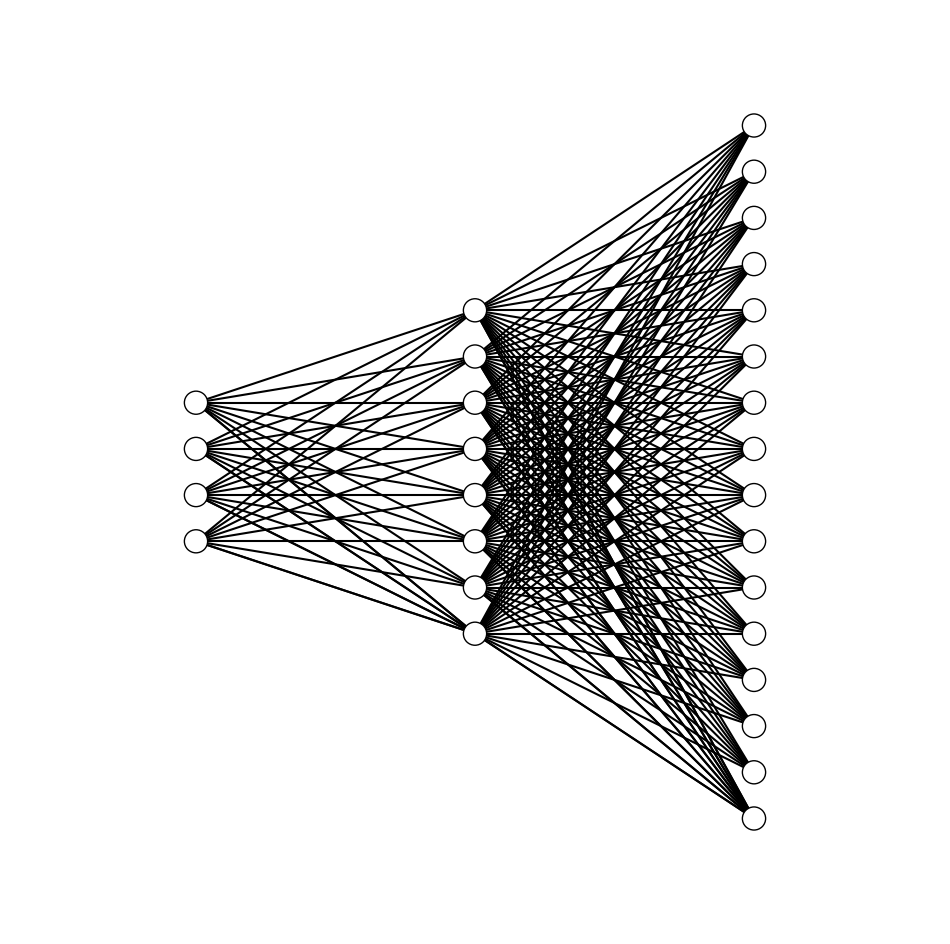

In [41]:
import matplotlib.pyplot as plt
color = ['#ff7f0e', '#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'lightcoral', 'chocolate', 'black', 'cadetblue', 'mediumaquamarine', 'goldenrod']

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            #if layer_size==layer_sizes[-1]:
                #circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                #color=color[m], ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)
        #for o in range(layer_size_b):
        #    line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
        #                      [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], color='red')
            ax.add_artist(line)

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .2, .8, .1, .9, [4, 8, 16])

# NN figure

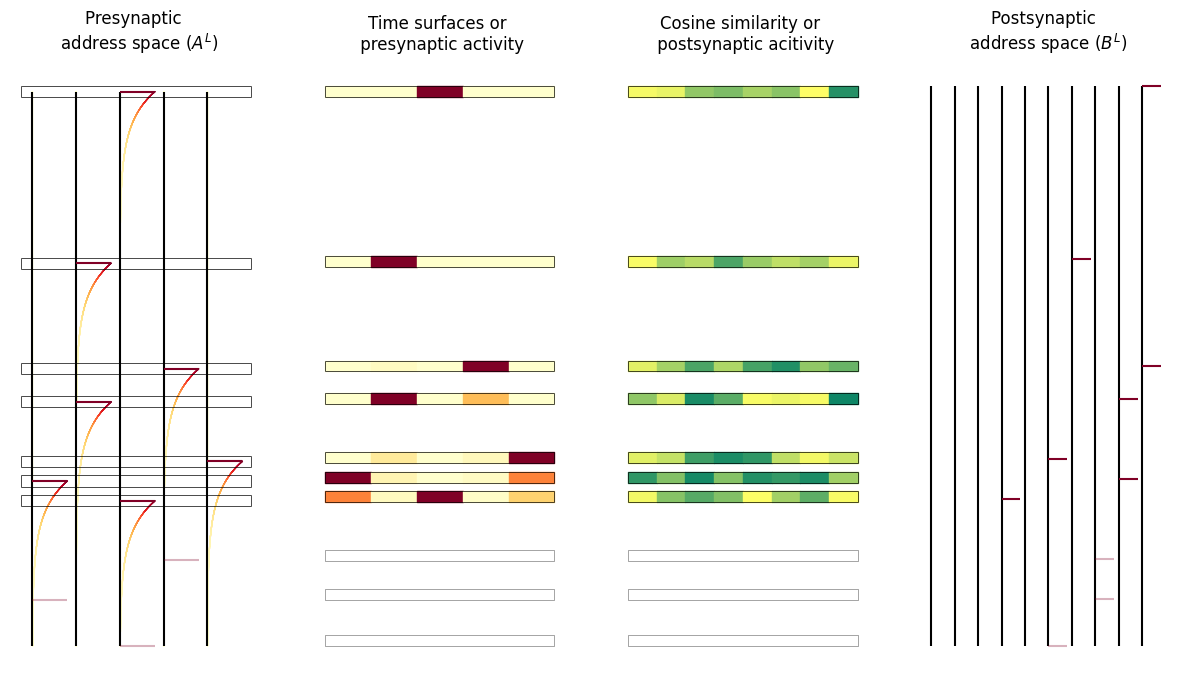

In [44]:
from matplotlib import cm

def norm(x):
    y = (x-np.min(x))/(np.max(x)-np.min(x))
    return y

def box_around(ax, x, alpha, lateral_edges, size):
    ax.hlines(1-x+size, lateral_edges[0], lateral_edges[1], 'k', linewidth=0.5, alpha=alpha)
    ax.hlines(1-x-size, lateral_edges[0], lateral_edges[1], 'k', linewidth=0.5, alpha=alpha)
    ax.vlines(lateral_edges[0],1-x-size, 1-x+size, 'k', linewidth=0.5, alpha=alpha)
    ax.vlines(lateral_edges[1],1-x-size, 1-x+size, 'k', linewidth=0.5, alpha=alpha)
    return ax

def make_ode(t,a,address_number,last_time,t_present):
    a = np.delete(a,np.where(t>1-t_present)[0])
    up_sampling = 100
    tau = 5*up_sampling
    y = np.zeros([address_number, last_time*up_sampling])
    for c in range(address_number):
        t_ev_c = (t[np.where(a==c)[0]]*last_time*up_sampling).astype(int)
        for i in range(len(t_ev_c)):
            x_tp = np.linspace(0,last_time*up_sampling-t_ev_c[i],last_time*up_sampling-t_ev_c[i])
            y_tp = np.exp(-x_tp/tau)
            y[c,t_ev_c[i]:t_ev_c[i]+len(y_tp)] = y_tp
    return y

def plot_event_stream(ax, y, t, len_time, t_present, a, address_number, title, height_spike, ts_box_size, with_decay=True):
    for ad in range(address_number):
        ax.vlines(ad/address_number, 0,1, 'k')
        if with_decay:
            ax.scatter(1/address_number*(ad+np.flip(y[ad])*0.8), np.arange(0,1,1/len(y[ad])), marker='.', s = 3, c=cm.YlOrRd(np.flip(y[ad])), edgecolor='none')
    #ax.hlines(t_present, -0.5, 1.5, linestyles='dashed', color='grey')
    for ev in range(nb_events):
        if 1-t[ev]<t_present:
            ax.hlines(1-t[ev], a[ev], a[ev]+height_spike, alpha=0.3, color=cm.YlOrRd(1000))
        else:
            ax.hlines(1-t[ev], a[ev], a[ev]+height_spike, color=cm.YlOrRd(1000))
            if with_decay:
                ax = box_around(ax, t[ev], 1, [-0.05, 1], ts_box_size)
    ax.set_title(title)
    return ax
    
def plot_ts(ax, y, t, t_present, a, address_number, title, ts_box_size):
    colormap = plt.cm.get_cmap('YlOrRd', 1000);
    for ev in range(nb_events):
        if 1-t[ev]<t_present:
            ax = box_around(ax, t[ev], 0.5, [0, 1], ts_box_size)
        else:
            ax = box_around(ax, t[ev], 1, [0, 1], ts_box_size)
            for i in range(address_number):
                ax.fill_between([i/address_number,(i+1)/address_number], 1-t[ev]-ts_box_size, 1-t[ev]+ts_box_size, color=colormap(y[i,int(y.shape[1]*t[ev])]))
    ax.set_title(title)
    
def plot_simil(ax, t, t_present, kernel_number, title, ts_box_size):
    colormap = plt.cm.get_cmap('summer', 1000);
    for ev in range(nb_events):
        if 1-t[ev]<t_present:
            ax = box_around(ax, t[ev], 0.5, [0, 1], ts_box_size)
        else:
            ax = box_around(ax, t[ev], 1, [0, 1], ts_box_size)
            for i in range(kernel_number):
                ax.fill_between([i/kernel_number,(i+1)/kernel_number], 1-t[ev]-ts_box_size, 1-t[ev]+ts_box_size, color=colormap(np.random.rand(1)))
    ax.set_title(title)
                
def plot_the_figure(address_number, max_time, events_number):
    
    height_spike = 1/address_number*0.8
    ts_box_size = 0.01
    
    fig, ax = plt.subplots(1,4,figsize=(15,8))
    for i in range(len(ax)):
        #for key, spine in ax[i].spines.items():
        #    spine.set_visible(False)
        #ax[i].set_yticks([])
        #ax[i].set_xticks([])
        ax[i].axis('off')
        
    np.random.seed(26)
    t = np.random.randint(low = 1, high = max_time, size = events_number)
    a = np.random.randint(low = 0, high = address_number, size = events_number)
    title = 'Presynaptic \n address space ($A^L$)'
    
    len_time = max(t)
    t = np.sort(norm(t))
    t_present = 1-t[6]
    
    y = make_ode(t,a,address_number,len_time,t_present)
    a = a/address_number
    
    ax[0] = plot_event_stream(ax[0], y, t, len_time, t_present, a, address_number, title, height_spike, ts_box_size)
    #ax[0].arrow(-0.5,1,0,-1, shape='full')
    
    plot_ts(ax[1], y, t, t_present, a, address_number, 'Time surfaces or \n presynaptic activity', ts_box_size)
    
    plot_simil(ax[2], t, t_present, 8, 'Cosine similarity or \n postsynaptic acitivity', ts_box_size)
    
    address_number *= 2
    height_spike *= .5
    a = np.random.randint(low = 0, high = address_number, size = events_number)
    a = a/address_number
    title = 'Postsynaptic \n address space ($B^L$)'
    ax[3] = plot_event_stream(ax[3], y, t, len_time, t_present, a, address_number, title, height_spike, ts_box_size, with_decay=False)
    return fig, ax

amax, tmax, nb_events = 5, 100, 10
fig, ax = plot_the_figure(amax, tmax, nb_events)

# NN 3D figure

In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def make_exp_kernel(a, t, tau, nb_channels, duration, frequency):
    time_k = np.linspace(0,5*tau, int(5*tau*frequency))
    kernel = np.exp(-time_k/tau)
    
    time = np.linspace(0,duration, int(duration*frequency))
    s = np.zeros(time.shape)
    spikes = np.tile(s, (nb_channels,1))
    spikes[a,t]=1

    mem_pot = spikes.copy()
    for evt in range(len(t)):
        mem_pot[a[evt],t[evt]:t[evt]+len(time_k)] = kernel[:duration*frequency-t[evt]]
        
    return mem_pot, spikes

def make_event_stream(nb_ev, nb_channels, tau, duration, frequency, seed_nb):
    np.random.seed(seed_nb)
    t = np.random.randint(low = 1, high = duration, size = nb_ev)*frequency
    a = np.random.randint(low = 0, high = nb_channels, size = nb_ev+1)
    t = np.append(t[np.argsort(t)],duration*frequency-1)#, a[np.argsort(t)]
    
    mem_pot, spikes = make_exp_kernel(a, t, tau, nb_channels, duration, frequency)

    return mem_pot, spikes

def transform_event_stream(spikes, nb_chanout):
    t = np.where(spikes==1)[1]
    a = np.random.randint(low = 0, high = nb_chanout, size = len(t))
    t = t[np.argsort(t)]
    mem_pot, spikes = make_exp_kernel(a, t, tau, nb_chanout, duration, frequency)

    return mem_pot, spikes

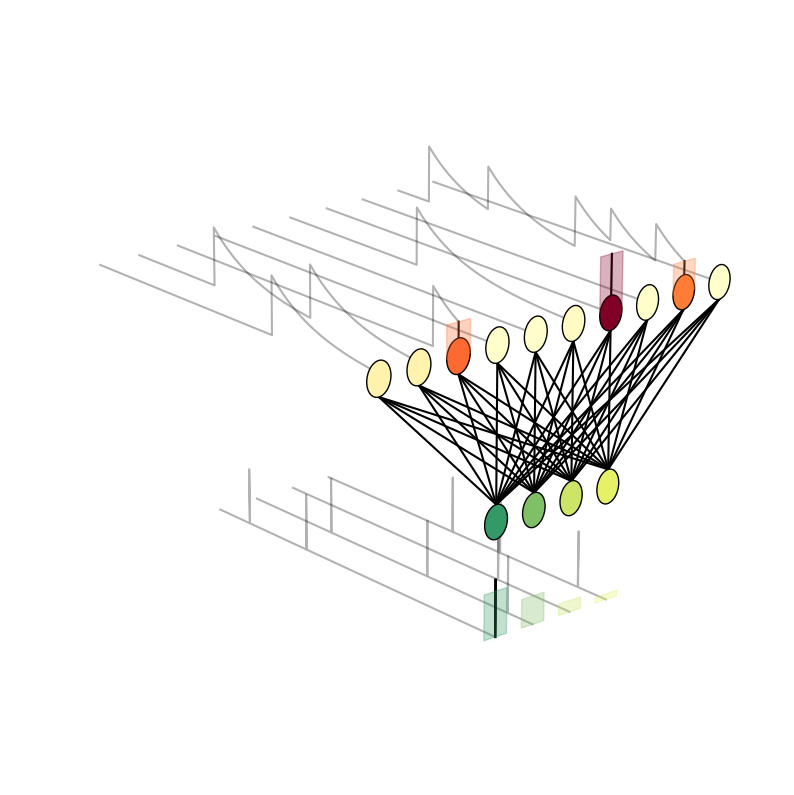

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection # New import
from matplotlib.patches import Ellipse, Rectangle, Arc
import mpl_toolkits.mplot3d.art3d as art3d

colormap = plt.cm.get_cmap('YlOrRd', 1000);
colormap2 = plt.cm.get_cmap('summer_r', 1000);
#parameters :
seed_nb = 9
nb_ev, nb_channels_pre, nb_channels_post, tau, duration, frequency = 10, 10, 4, 30, 200, 10
alpha_past, alpha_bar = .3, .3
vertical_shift, NN_shift = 5, .6
width, height = .6, .6

fig = plt.figure(figsize=(10,18))
ax = fig.add_subplot(111, projection='3d')

pre_pot, pre_spik = make_event_stream(nb_ev, nb_channels_pre, tau, duration, frequency, seed_nb)

post_pot, post_spik = transform_event_stream(pre_spik, nb_channels_post)
# ____ output values _______
values = [.1,.5,.2,.8]
val, ind = values[np.argmax(post_spik[:,-1])], np.argmax(values)
values[np.argmax(post_spik[:,-1])] = values[ind]
values[ind] = val
# ____ output values _______

len_t = pre_pot.shape[1]
xs = np.arange(len_t)

# plot postsynaptic spikes
for chan in range(nb_channels_post):
    ys = np.ones(len_t)*chan
    max_output = np.argmax(values)
    ax.plot(xs, ys+(nb_channels_pre-nb_channels_post)/2, post_spik[chan,:]-vertical_shift, 'k', alpha = alpha_past)
    ax.plot([xs[-1], xs[-1]], [max_output+(nb_channels_pre-nb_channels_post)/2, max_output+(nb_channels_pre-nb_channels_post)/2], [-vertical_shift,-vertical_shift+1], 'k');

# plot presynaptic membrane potential
for chan in range(nb_channels_pre):
    ys = np.ones(len_t)*chan
    ax.plot(xs, ys, pre_pot[chan,:], 'k', alpha = alpha_past)
    ax.plot([xs[-1], xs[-1]], [ys[-1], ys[-1]], [0,pre_pot[chan,-1]], c = 'k', alpha = 1)
    
# plot time surface 
for chan in range(nb_channels_pre):
    p = Rectangle((chan-width/2, 0), width = width, height = pre_pot[chan,-1], color = colormap(pre_pot[chan,-1]), alpha = alpha_bar)
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=xs[-1], zdir="x")
    
# plot neural network
for chan in range(nb_channels_pre):
    p = Ellipse((chan, 0), width = width, height = height, facecolor = colormap(pre_pot[chan,-1]), alpha = 1, edgecolor = 'k')
    #p = Arc((chan, 0), width = width, height = height, theta1=0, theta2=90, facecolor = colormap(pre_pot[chan,-1]), alpha = alpha_bar, edgecolor = 'k')
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=xs[-1], zdir="x")
    
for chan in range(nb_channels_post):
    p = Ellipse((chan+(nb_channels_pre-nb_channels_post)/2, -vertical_shift*NN_shift), width = width, height = height, facecolor = colormap2(values[chan]), edgecolor = 'k')
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=xs[-1], zdir="x")
    for chan_pre in range(nb_channels_pre):
        ax.plot([xs[-1], xs[-1]], [chan+(nb_channels_pre-nb_channels_post)/2, chan_pre], [-vertical_shift*NN_shift+height/2,-height/2], color = 'k')
        
# plot output values
for chan in range(nb_channels_post):
    p = Rectangle((chan+(nb_channels_pre-nb_channels_post)/2-width/2, -vertical_shift), width = width, height = values[chan], color = colormap2(values[chan]), alpha = alpha_bar)
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=xs[-1], zdir="x")

# plot in red the argmax function
#max_output = np.argmax(values)
#p = Ellipse((max_output+(nb_channels_pre-nb_channels_post)/2, -vertical_shift*NN_shift), width = width, height = height, fill = False, edgecolor = 'r')
#ax.add_patch(p)
#art3d.pathpatch_2d_to_3d(p, z=xs[-1], zdir="x")
#ax.plot([xs[-1], xs[-1]], [max_output+(nb_channels_pre-nb_channels_post)/2, max_output+(nb_channels_pre-nb_channels_post)/2], [-vertical_shift,-vertical_shift+1], 'r');
ax.view_init(20, -40)
ax.axis('off');
#ax.text(0, nb_channels_pre/6, 1, 'presynpatic address space', zdir='y')
#ax.text(0, nb_channels_pre/6, -4, 'postsynpatic address space', zdir='y')
#ax.text(len_t/2, 0, -5, 'time', zdir='x')
#ax.text(xs[-1], nb_channels_pre, 0, 'time \n surface')

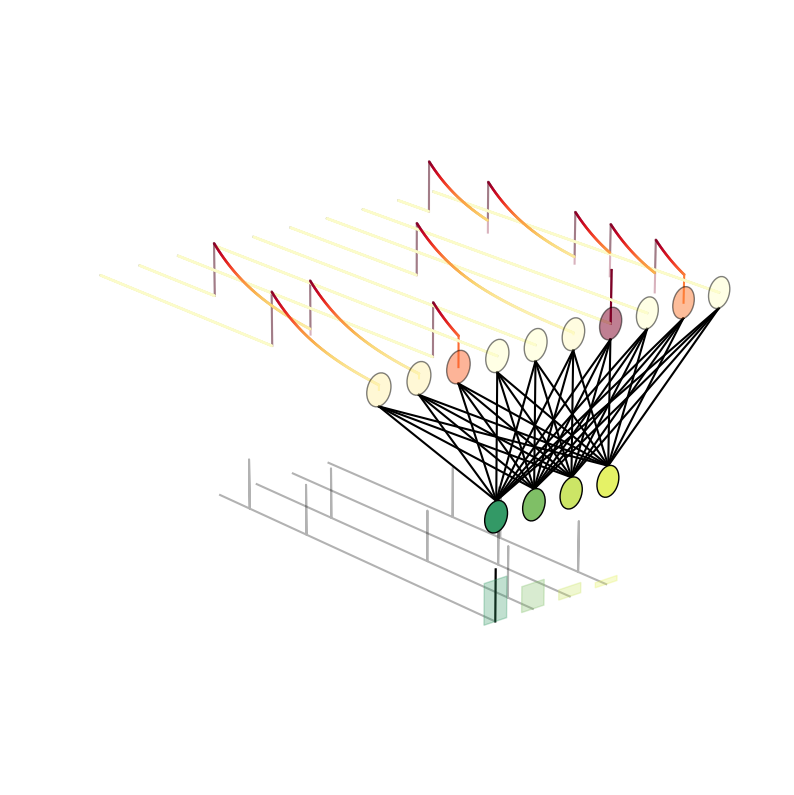

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection # New import
from matplotlib.patches import Ellipse, Rectangle
import mpl_toolkits.mplot3d.art3d as art3d

colormap = plt.cm.get_cmap('YlOrRd', 1000);
colormap2 = plt.cm.get_cmap('summer_r', 1000);
#parameters :
seed_nb = 9
nb_ev, nb_channels_pre, nb_channels_post, tau, duration, frequency = 10, 10, 4, 30, 200, 10
alpha_past, alpha_bar = .3, .3
vertical_shift, NN_shift = 5, .6
width, height = .6, .6

fig = plt.figure(figsize=(10,18))
ax = fig.add_subplot(111, projection='3d')

pre_pot, pre_spik = make_event_stream(nb_ev, nb_channels_pre, tau, duration, frequency, seed_nb)

post_pot, post_spik = transform_event_stream(pre_spik, nb_channels_post)
# ____ output values _______
values = [.1,.5,.2,.8]
val, ind = values[np.argmax(post_spik[:,-1])], np.argmax(values)
values[np.argmax(post_spik[:,-1])] = values[ind]
values[ind] = val
# ____ output values _______

len_t = pre_pot.shape[1]
xs = np.arange(len_t)

# plot postsynaptic spikes
for chan in range(nb_channels_post):
    ys = np.ones(len_t)*chan
    ax.plot(xs, ys+(nb_channels_pre-nb_channels_post)/2, post_spik[chan,:]-vertical_shift, 'k', alpha = alpha_past)
    
# plot neural network
for chan in range(nb_channels_pre):
    p = Ellipse((chan, 0), width = width, height = height, edgecolor = 'k', facecolor=colormap(pre_pot[chan,-1]), alpha=.5)
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=xs[-1], zdir="x")

# plot presynaptic membrane potential
for chan in range(nb_channels_pre):
    ys = np.ones(len_t)*chan
    ax.plot(xs, ys, pre_pot[chan,:], 'k', alpha = alpha_past)
    ax.plot([xs[-1], xs[-1]], [ys[-1], ys[-1]], [0,pre_pot[chan,-1]], c = colormap(pre_pot[chan,-1]), alpha = 1)
    spikes = np.where(pre_spik[chan,:]==1)[0]
    ax.scatter(xs,ys,pre_pot[chan,:], marker='.', s = 3, c=colormap(pre_pot[chan,:]), alpha = alpha_past)
    for i in spikes:
        ax.plot([xs[i],xs[i]], [ys[i],ys[i]], [0,pre_spik[chan,i]], c=colormap(pre_pot[chan,i]), alpha = alpha_past)
    
# plot time surface 
#for chan in range(nb_channels_pre):
#    p = Rectangle((chan-width/2, 0), width = width, height = pre_pot[chan,-1], color = colormap(1000), alpha = .8)
#    ax.add_patch(p)
#    art3d.pathpatch_2d_to_3d(p, z=xs[-1], zdir="x")
    
for chan in range(nb_channels_post):
    p = Ellipse((chan+(nb_channels_pre-nb_channels_post)/2, -vertical_shift*NN_shift), width = width, height = height, facecolor = colormap2(values[chan]), edgecolor = 'k')
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=xs[-1], zdir="x")
    for chan_pre in range(nb_channels_pre):
        ax.plot([xs[-1], xs[-1]], [chan+(nb_channels_pre-nb_channels_post)/2, chan_pre], [-vertical_shift*NN_shift+height/2,-height/2], color = 'k')
        
# plot output values
for chan in range(nb_channels_post):
    p = Rectangle((chan+(nb_channels_pre-nb_channels_post)/2-width/2, -vertical_shift), width = width, height = values[chan], color = colormap2(values[chan]), alpha = alpha_bar)
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=xs[-1], zdir="x")

# plot in red the argmax function
max_output = np.argmax(values)
#p = Ellipse((max_output+(nb_channels_pre-nb_channels_post)/2, -vertical_shift*NN_shift), width = width, height = height, fill = False, edgecolor = 'r')
#ax.add_patch(p)
#art3d.pathpatch_2d_to_3d(p, z=xs[-1], zdir="x")
ax.plot([xs[-1], xs[-1]], [max_output+(nb_channels_pre-nb_channels_post)/2, max_output+(nb_channels_pre-nb_channels_post)/2], [-vertical_shift,-vertical_shift+1], 'k');
ax.view_init(20, -40)
ax.axis('off');
#ax.text(0, nb_channels_pre/6, 1, 'presynpatic address space', zdir='y')
#ax.text(0, nb_channels_pre/6, -4, 'postsynpatic address space', zdir='y')
#ax.text(len_t/2, 0, -5, 'time', zdir='x')
#ax.text(xs[-1], nb_channels_pre, 0, 'time \n surface')

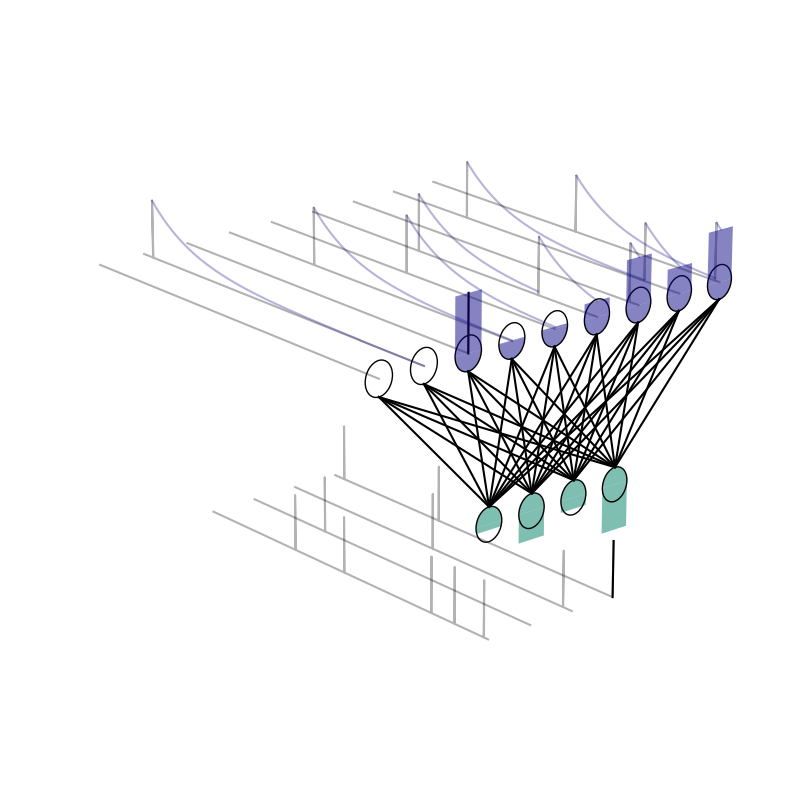

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection # New import
from matplotlib.patches import Ellipse, Rectangle, Wedge
import mpl_toolkits.mplot3d.art3d as art3d

colormap = plt.cm.get_cmap('plasma', 1000);
colormap2 = plt.cm.get_cmap('summer_r', 1000);
#parameters :
seed_nb = 26
nb_ev, nb_channels_pre, nb_channels_post, tau, duration, frequency = 10, 9, 4, 30, 200, 10
alpha_past, alpha_bar = .3, .5
vertical_shift, NN_shift = 5, .6
width, height = .6, .6

fig = plt.figure(figsize=(10,18))
ax = fig.add_subplot(111, projection='3d')

pre_pot, pre_spik = make_event_stream(nb_ev, nb_channels_pre, tau, duration, frequency, seed_nb)

post_pot, post_spik = transform_event_stream(pre_spik, nb_channels_post)
# ____ output values _______
values = [.1,.5,.2,.8]
val, ind = values[np.argmax(post_spik[:,-1])], np.argmax(values)
values[np.argmax(post_spik[:,-1])] = values[ind]
values[ind] = val
# ____ output values _______

len_t = pre_pot.shape[1]
xs = np.arange(len_t)

# plot postsynaptic spikes
for chan in range(nb_channels_post):
    ys = np.ones(len_t)*chan
    ax.plot(xs, ys+(nb_channels_pre-nb_channels_post)/2, post_spik[chan,:]-vertical_shift, 'k', alpha = alpha_past)

# plot presynaptic membrane potential
for chan in range(nb_channels_pre):
    ys = np.ones(len_t)*chan
    ax.plot(xs, ys, pre_spik[chan,:], c='k', alpha = alpha_past)
    ax.plot([xs[-1], xs[-1]], [ys[-1], ys[-1]], [0,pre_spik[chan,-1]], c = 'k', alpha = 1)
    spikes = np.where(pre_spik[chan,:]==1)[0]
    #ax.scatter(xs,ys,pre_pot[chan,:], marker='.', s = 3, c=colormap(pre_pot[chan,:]), alpha = alpha_past)
    for ind, s in enumerate(spikes):
        if ind==len(spikes)-1:
            ax.plot(xs[s+1:], ys[s+1:], pre_pot[chan,s+1:], c=colormap(0), alpha = alpha_past)
        else:
            ax.plot(xs[s+1:spikes[ind+1]], ys[s+1:spikes[ind+1]], pre_pot[chan,s+1:spikes[ind+1]], c=colormap(0), alpha = alpha_past)
    #    ax.plot([xs[i],xs[i]], [ys[i],ys[i]], [0,pre_spik[chan,i]], c=colormap(pre_pot[chan,i]), alpha = alpha_past)
    
# plot time surface 
for chan in range(nb_channels_pre):
    if pre_pot[chan,-1]>0:
        p = Rectangle((chan-width/2, 0), width = width, height = pre_pot[chan,-1], fc = colormap(0), alpha = alpha_bar)
        w = Wedge((chan, 0), width/2, 180, 360, fc=colormap(0), alpha = alpha_bar)
        ax.add_patch(p)
        ax.add_patch(w)
        art3d.pathpatch_2d_to_3d(p, z=xs[-1], zdir="x")
        art3d.pathpatch_2d_to_3d(w, z=xs[-1], zdir="x")
    
# plot neural network
for chan in range(nb_channels_pre):
    p = Ellipse((chan, 0), width = width, height = height, edgecolor = 'k', facecolor=(0,0,0,0))
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=xs[-1], zdir="x")
    
for chan in range(nb_channels_post):
    p = Ellipse((chan+(nb_channels_pre-nb_channels_post)/2, -vertical_shift*NN_shift), width = width, height = height, facecolor = (0,0,0,0), edgecolor = 'k')
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=xs[-1], zdir="x")
    for chan_pre in range(nb_channels_pre):
        ax.plot([xs[-1], xs[-1]], [chan+(nb_channels_pre-nb_channels_post)/2, chan_pre], [-vertical_shift*NN_shift+height/2,-height/2], color = 'k')
        
# plot output values
for chan in range(nb_channels_post):
    p = Rectangle((chan+(nb_channels_pre-nb_channels_post)/2-width/2, -vertical_shift*NN_shift), width = width, height = -values[chan], fc = colormap2(1000), alpha = alpha_bar)
    w = Wedge((chan+(nb_channels_pre-nb_channels_post)/2, -vertical_shift*NN_shift), width/2, 0, 180, fc=colormap2(1000), alpha = alpha_bar)
    ax.add_patch(p)
    ax.add_patch(w)
    art3d.pathpatch_2d_to_3d(p, z=xs[-1], zdir="x")
    art3d.pathpatch_2d_to_3d(w, z=xs[-1], zdir="x")

# plot in red the argmax function
max_output = np.argmax(values)
#p = Ellipse((max_output+(nb_channels_pre-nb_channels_post)/2, -vertical_shift*NN_shift), width = width, height = height, fill = False, edgecolor = 'r')
#ax.add_patch(p)
#art3d.pathpatch_2d_to_3d(p, z=xs[-1], zdir="x")
ax.plot([xs[-1], xs[-1]], [max_output+(nb_channels_pre-nb_channels_post)/2, max_output+(nb_channels_pre-nb_channels_post)/2], [-vertical_shift,-vertical_shift+1], 'k');
ax.view_init(20, -40)
ax.axis('off');
#ax.text(0, nb_channels_pre/6, 1, 'presynpatic address space', zdir='y')
#ax.text(0, nb_channels_pre/6, -4, 'postsynpatic address space', zdir='y')
#ax.text(len_t/2, 0, -5, 'time', zdir='x')
#ax.text(xs[-1], nb_channels_pre, 0, 'time \n surface')

In [ ]:
#%load_ext tikzmagic

In [ ]:
#%%tikz
#\draw [anchor=north west] (0, 5) node {\includegraphics[width=5cm]{name}};
#\draw [anchor=north west] (5, 5) node {\includegraphics[width=3cm]{f'{path}time_suface.pdf'}};
#\draw [anchor=north west] (5, 3) node {\includegraphics[width=3cm]{{f'{path}time_suface.pdf'}};